In [1]:
pip install rembg pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 4.8 MB/s eta 0:00:00


In [ ]:
from rembg import remove
from PIL import Image
import numpy as np

# Load your image
input_image = Image.open('2010_HONDA_CIVIC_LX_42147943_005.png')

# Remove background using the CAR segmentation model
output = remove(input_image, session='car')  # Uses the car-specific model

# Save the result
output.save('output.png')

ModuleNotFoundError: No module named 'onnxruntime'

In [2]:
!pip install rembg onnxruntime


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.0 MB/s eta 0:00:00


In [ ]:
from rembg import remove
from PIL import Image

# Load your image
input_image = Image.open('2019_KIA_SOUL_42137420_005.jpg')

# Remove background (general model)
output = remove(input_image)

# Save the result
output.save('output.png')


In [3]:
pip install rembg pillow opencv-python numpy


In [ ]:
from rembg import remove
from PIL import Image
import numpy as np
import cv2

# Step 1: Load original image
input_path = '2010_HONDA_CIVIC_LX_42147943_005.jpg'
original = Image.open(input_path).convert("RGBA")

# Step 2: Remove background
removed = remove(original)
removed.save("removed.png")  # Save for preview

# Step 3: Convert to numpy for OpenCV processing
removed_np = np.array(removed)

# Step 4: Replace transparent or dark background with solid white/gray
# Extract alpha channel (transparency)
alpha = removed_np[:, :, 3]

# Create white background (255, 255, 255) or gray (e.g., (200, 200, 200))
background_color = (200, 200, 200)  # Light gray

# Make new image where alpha is used to composite foreground and background
new_background = np.full(removed_np.shape, background_color + (255,), dtype=np.uint8)
final_result = np.where(alpha[..., None] == 0, new_background, removed_np)

# Step 5: Save the result
final_image = Image.fromarray(final_result)
final_image.save("clean_output.png")


In [ ]:
from rembg import remove
from PIL import Image
import numpy as np
import cv2

def has_background(image_np, threshold=30):
    """
    Check if the background is likely present based on corner color variance.
    """
    h, w, _ = image_np.shape

    # Crop corners (10% area)
    corner_size = int(min(h, w) * 0.1)
    corners = [
        image_np[0:corner_size, 0:corner_size],               # top-left
        image_np[0:corner_size, -corner_size:],              # top-right
        image_np[-corner_size:, 0:corner_size],              # bottom-left
        image_np[-corner_size:, -corner_size:]               # bottom-right
    ]

    # Compute std deviation (if very low, it's likely a solid background)
    std_devs = [np.std(corner) for corner in corners]
    avg_std = np.mean(std_devs)

    return avg_std > threshold  # True if varied background

# === Load image ===
input_path = '2019_KIA_SOUL_42137420_005.jpg'
original = Image.open(input_path).convert("RGBA")
original_np = np.array(original)

# === Check background presence ===
if has_background(original_np):
    print("Background detected — removing.")
    removed = remove(original)
    removed.save("smart_removed.png")
else:
    print("No background detected — keeping original.")
    original.save("smart_removed.png")


Background detected — removing.


✅ Clean background removed successfully!


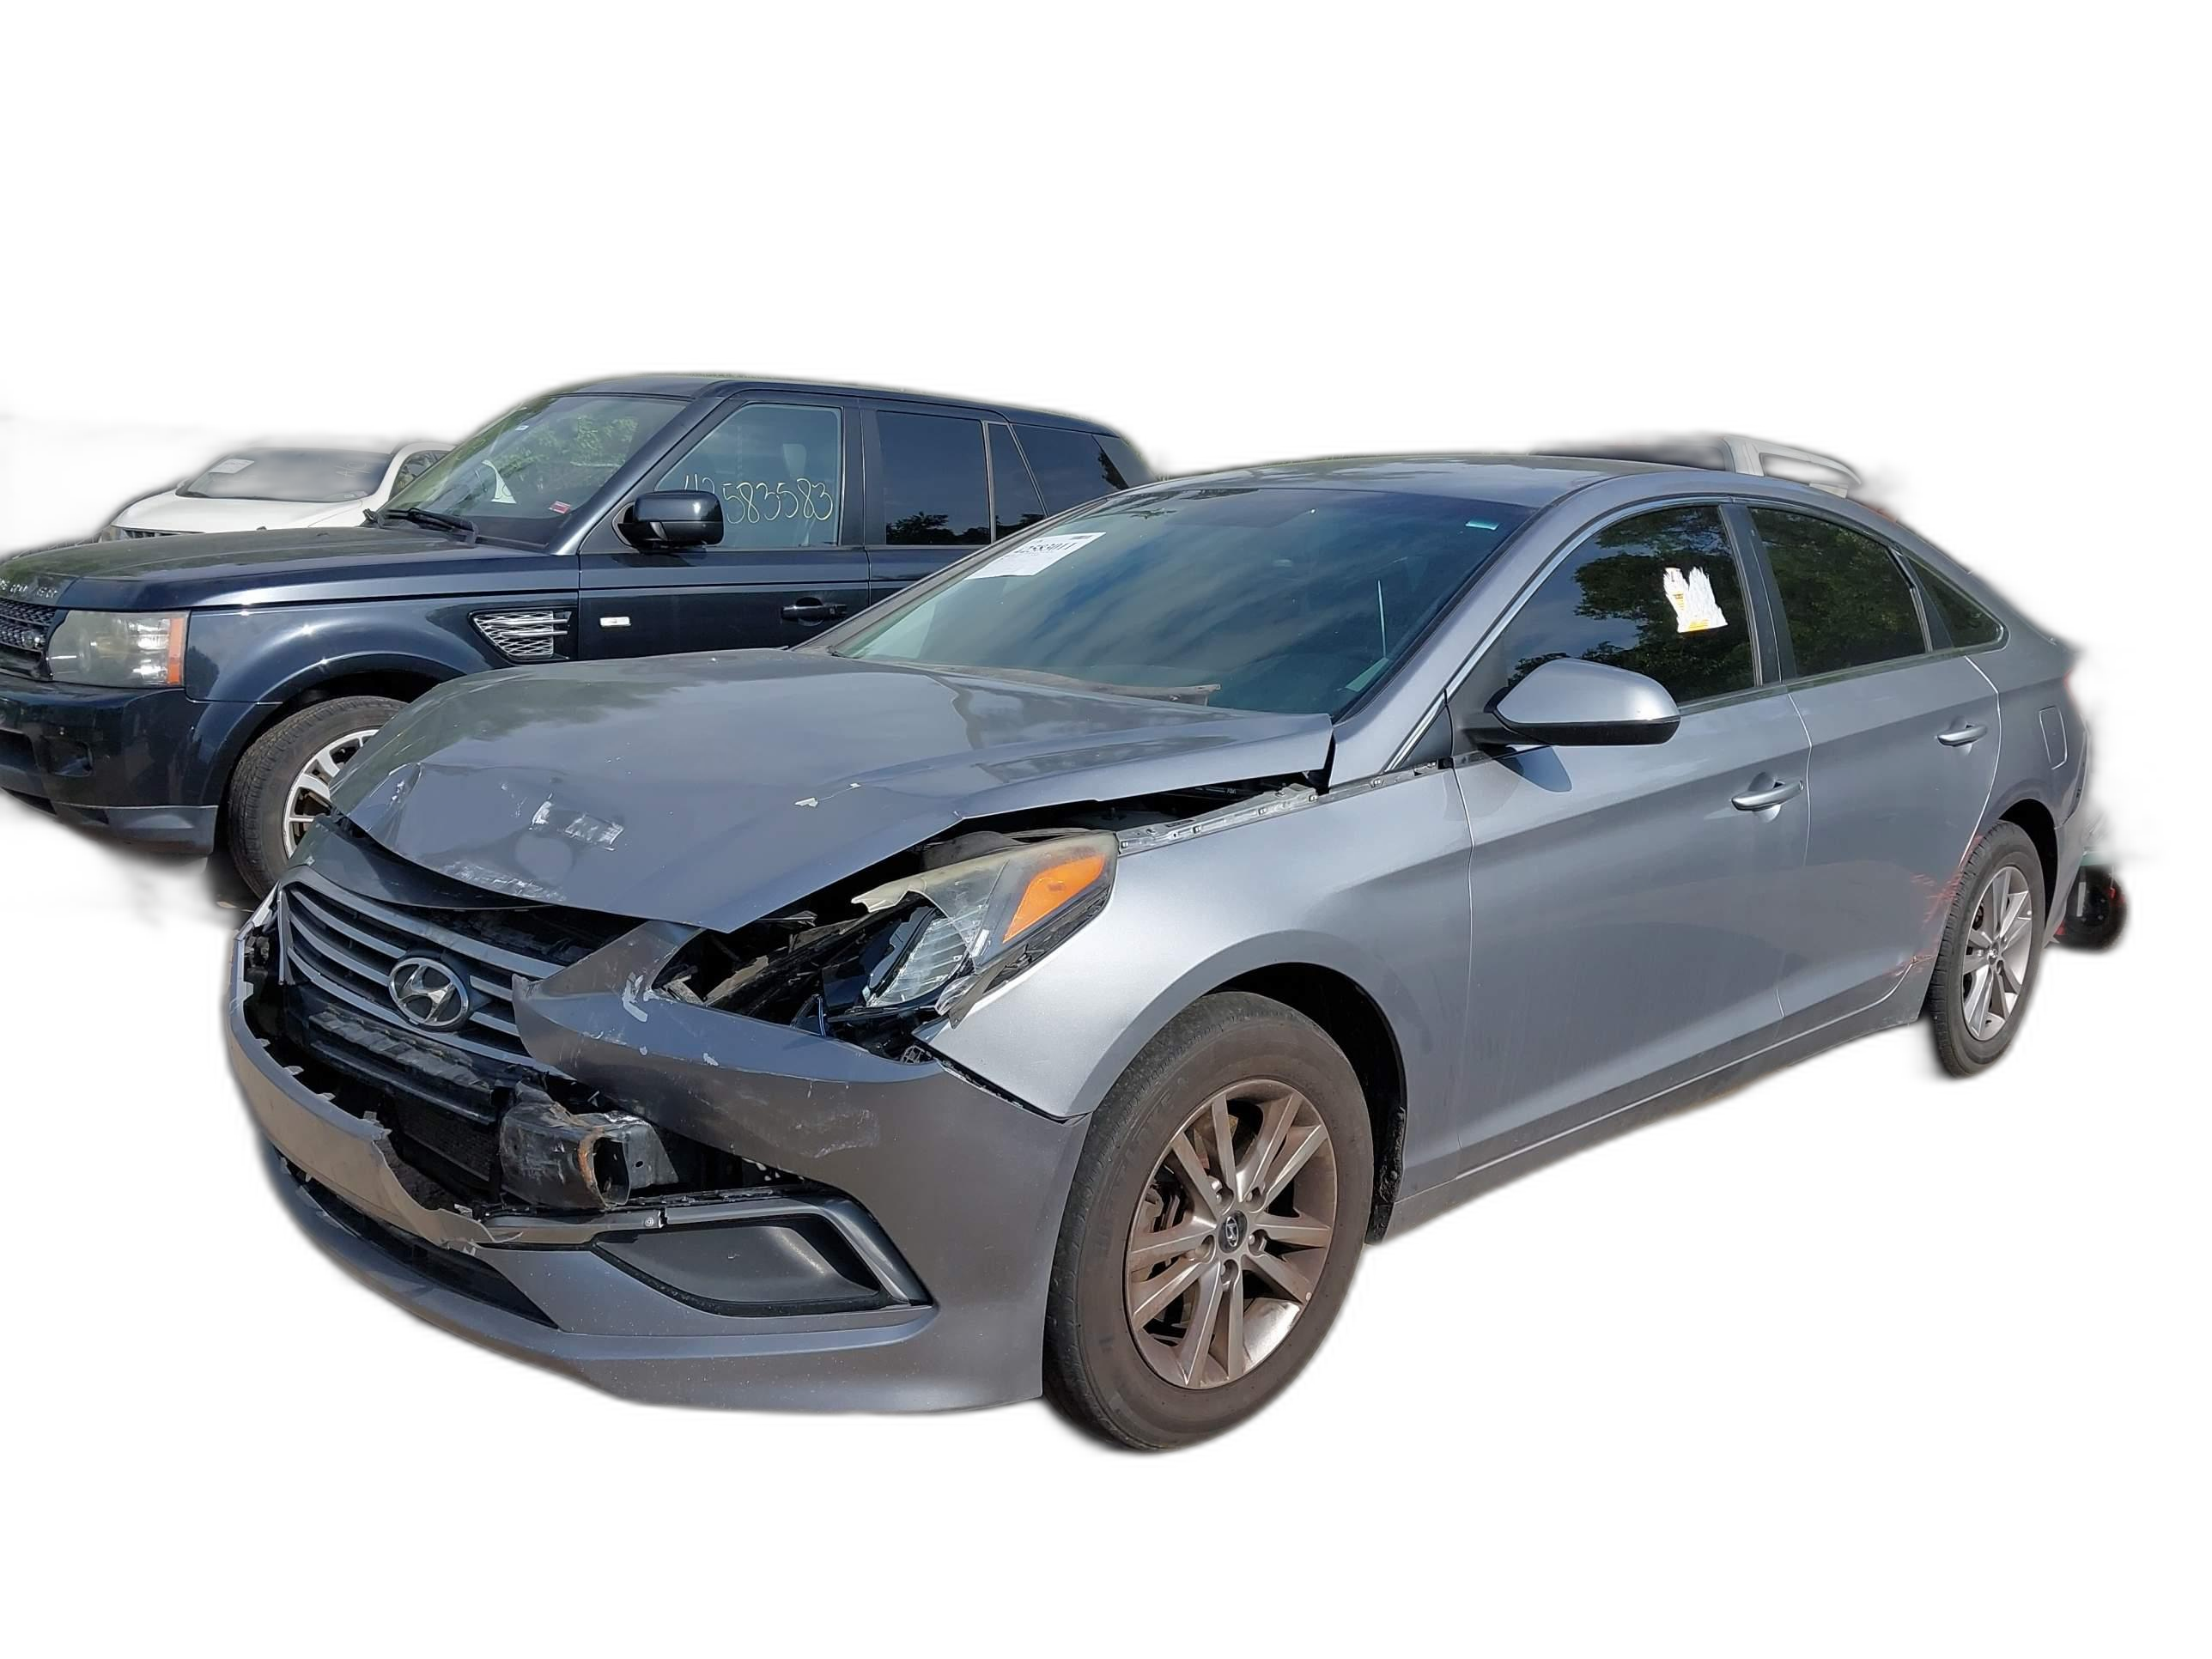

In [7]:
from rembg import remove
from PIL import Image
import numpy as np

def clean_transparent_car_image(input_path, output_path="clean_removed.png"):
    # Open image
    image = Image.open(input_path).convert("RGB")

    # Remove background using Rembg
    output = remove(image)  # Default mode = U2Net (best for object boundaries)

    # Save with transparent background
    output.save(output_path)
    print("✅ Clean background removed successfully!")

    return output

# === Usage ===
clean_transparent_car_image("2016_HYUNDAI_SONATA_42583011_002.jpg", "clean_car_output.png")
